In [1]:
load('../etala_utilities.sage')

# 2019 Summer Exam

## Problem 1
![image.png](problem1.png)

### 1.

In order to solve the equations, the augmented matrices are formed and put into row reduced echelon form

In [2]:
A = Matrix(SR, 4, 3, [2, 1, 3, 3, 0, 6, -1, 2, -4, 1, -2, 4])
b = vector(SR, [4, 12, -12, 12])
A0 = A.augment(vector(SR, 4), subdivide=True); show_var()
Ab = A.augment(b, subdivide=True); show_var()
A0_rref = A0.rref(); show_var()
Ab_rref = Ab.rref(); show_var()

\text{A0} = \left[\begin{array}{rrr|r}
2 & 1 & 3 & 0 \\
3 & 0 & 6 & 0 \\
-1 & 2 & -4 & 0 \\
1 & -2 & 4 & 0
\end{array}\right]

\text{Ab} = \left[\begin{array}{rrr|r}
2 & 1 & 3 & 4 \\
3 & 0 & 6 & 12 \\
-1 & 2 & -4 & -12 \\
1 & -2 & 4 & 12
\end{array}\right]

\text{A0_rref} = \left[\begin{array}{rrr|r}
1 & 0 & 2 & 0 \\
0 & 1 & -1 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{array}\right]

\text{Ab_rref} = \left[\begin{array}{rrr|r}
1 & 0 & 2 & 4 \\
0 & 1 & -1 & -4 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{array}\right]

for the first equation, this yields the equations:  
$x_1 + 2x_3 = 0 \Leftrightarrow x_1 = -2x_3$  
$x_2 - x_3 = 0 \Leftrightarrow x_2 = x_3$  
which leads to the general solution:  
$\bs x = x_3 \begin{bmatrix} -2 \\ 1 \\ 1 \end{bmatrix} $  

for the second equation, this yields the equations:  
$x_1 + 2x_3 = 4 \Leftrightarrow x_1 = 4 - 2x_3$  
$x_2 - x_3 = -4 \Leftrightarrow x_2 = -4 + x_3$  
which leads to the general solution:  
$\bs x = \begin{bmatrix} 4 \\ -4 \\ 0 \end{bmatrix} + x_3 \begin{bmatrix} -2 \\ 1 \\ 1 \end{bmatrix} $  

### 2.

Since the column space of $A$ is the set of all $\bs b$ such that $A\bs x = \bs b$ has a solution, it is only possible if Col(A) doesn't span $\Bbb R^4$. Since this would require at least four vectors, and A only has three columns, __it is possible to find a $\bs b$ such that $A\bs x = \bs b$ doesn't have a solution__.

## Problem 2
![image.png](problem2.png)

### 1.

By theorem 12 in chapter 4, any set of 3 linearly independent vectors in $\Bbb R^3$ forms a basis for $\Bbb R^3$.
Therefore if the set $\left\{\bs v_1, \bs v_2, \bs v_3 \right\}$ is linearly independent.  
To check this the three vectors are concatenated to form a matrix. By the invertible matrix theorem, the formed matrix will have a pivot in every row if and only if the columns are linearly independent.

In [3]:
P = Matrix(3, 3, [1, 0, 2, 0, 1, 1, -3, 2, 2]); show_var()
P_rref = P.rref(); show_var()

\text{P} = \left[\begin{array}{rrr}
1 & 0 & 2 \\
0 & 1 & 1 \\
-3 & 2 & 2
\end{array}\right]

\text{P_rref} = \left[\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right]

since there are three pivots, __the set $\left\{\bs v_1, \bs v_2, \bs v_3 \right\}$ forms a basis for $\Bbb R^3$__. 

### 2.

By theorem 15 in chapter 4, the matrix $P$ above is the matrix for change of basis from the basis formed by  $\left\{\bs v_1, \bs v_2, \bs v_3 \right\}$ to $\Bbb R^3$

In [4]:
b = vector([7, 2, 7])
b_new_basis = P.inverse()*b; show_var()

\text{b_new_basis} = \left(-1,\,-2,\,4\right)

## Problem 3
![image.png](problem3.png)

### 1.

To check the system for consistency, the augmented matrix is row reduced

In [5]:
A = Matrix(4, 3, [1, 3, 4, -1, 0, 1, 2, -2, 2, 1, 2, -1])
b = vector([-2, 3, 0, -5])
Ab_aug = A.augment(b)
Ab_rref = Ab_aug.rref(); show_var()

\text{Ab_rref} = \left[\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{array}\right]

Since the last row corresponds to $0 = 1$ __the system is inconsistent.__

### 2.

In order to find the least squares solution, the pseudo inverse of A is determined. Since the columns of A are linearly independent (as can be seen in the rref(A) above), by theorem 14 in chapter 6, the least squares solution can be determined as $\boldsymbol{\hat{x}} = \left(A^TA\right)^{-1}A^T \bs b$

In [6]:
x_hat = (A.T*A).inverse()*A.T*b; show_var()

\text{x_hat} = \left(-\frac{901}{451},\,-\frac{507}{451},\,\frac{384}{451}\right) = \left(-2.00,\,-1.12,\,0.851\right)

### 3.

In order to determine which x is the better solution, the lengths of the residual vectors are compared

In [7]:
x_1 = vector([2, 0, 0])
x_2 = vector([0, 2, 0])
e_x_1 = (b - A*x_1).norm(); show_var()  # could be the other way around, but the norm is the same
e_x_2 = (b - A*x_2).norm(); show_var()  # here too

\text{e_x_1} = \sqrt{106} \sim 10.3

\text{e_x_2} = \sqrt{170} \sim 13.0

Since $\vert \epsilon_{x_1} \vert $ is smaller than $\vert \epsilon_{x_2} \vert $, $x_1$ is a better solution in the least squares sense.

## Problem 4
![image.png](problem4.png)

### 1.

__True__  
By scaling each row in the described matrix by the value on the diagonal of the given row, a row reduced echelon form with ones along the diagonal must result. By the invertible matrix theorem, such a matrix is invertible

### 2.

__False__  
This would lead to an infinite number of eigenvalues. It is however true that if matrix A has an _eigenvector_ $\bs v$, then $c\bsv$ is also an eigenvector of A

### 3.

__False__  
To test this, determine the eigenvalues of the matrix:

In [8]:
A = Matrix(2, 2, [-3, 3, 3, -3])
A.eigenvalues()

[0, -6]

Since the eigenvalues are <= 0, the matrix is negative semi-definite

## Problem 5
![image.png](problem5.png)

### 1.

In order to show that $R(\theta)$ is orthogonal, the inner product of the columns must be 0

In [9]:
var('theta')
R_theta = Matrix(SR, 2, 2, [cos(theta), -sin(theta), sin(theta), cos(theta)]); show_var()
inner_p_R = R_theta.column(0).inner_product(R_theta.column(1)); show_var()

\text{R_theta} = \left[\begin{array}{rr}
\cos\left(\theta\right) & -\sin\left(\theta\right) \\
\sin\left(\theta\right) & \cos\left(\theta\right)
\end{array}\right]

\text{inner_p_R} = 0

And so __$R(\theta)$ is orthogonal__.

### 2.

In order to show this, the two sides of the equation are calculated algebraically:

In [10]:
R_theta_sq = R_theta^2; show_var()
R_theta_double = Matrix(SR, 2, 2, [cos(2*theta), -sin(2*theta), sin(2*theta), cos(2*theta)]); show_var()

\text{R_theta_sq} = \left[\begin{array}{rr}
\cos\left(\theta\right)^{2} - \sin\left(\theta\right)^{2} & -2 \, \cos\left(\theta\right) \sin\left(\theta\right) \\
2 \, \cos\left(\theta\right) \sin\left(\theta\right) & \cos\left(\theta\right)^{2} - \sin\left(\theta\right)^{2}
\end{array}\right]

\text{R_theta_double} = \left[\begin{array}{rr}
\cos\left(2 \, \theta\right) & -\sin\left(2 \, \theta\right) \\
\sin\left(2 \, \theta\right) & \cos\left(2 \, \theta\right)
\end{array}\right]

The following trigonometric identities, then show how these are equal:  
$ cos(2x) = cos(x)^2 - sin(x)^2$  (cell 1,1 and 2,2)  
$ sin(2x) = 2 sin(x) cos(x) $  (cell 1,2 and 2,1)

### 3.

$R^2(\theta) has already been calculated above.  
extracting the trigonometric

## Problem 6
![image.png](problem6.png)

### 1.

Since the two halves are negatives of each other, $A = -A^T$ for a skew-symmetric matrix.

### 2.

To test that $\Bbb S^{3\times3}$ is a vector space, the fact that addition and multiplication by a scalar is defined, plus the 10 axioms of vector spaces must be shown to be true.

Firstly note that addition and multiplication by scalars is defined for all matrices, so the elements of $\Bbb S^{3\times3}$ are valid vectors.  
The fact that the vector space is closed under addition, can be shown by calculating the algebraic sum of two arbitrary 3x3 skew-symmetrix matrices:

In [11]:
var('a_1, a_2, a_3, b_1, b_2, b_3')
A = Matrix(SR, 3, 3, [0, a_1, a_2, -a_1, 0, a_3, -a_2, -a_3, 0])
B = Matrix(SR, 3, 3, [0, b_1, b_2, -b_1, 0, b_3, -b_2, -b_3, 0])
show(A, ' + ', B, ' = ', A+B)

[   0  a_1  a_2]
[-a_1    0  a_3]
[-a_2 -a_3    0] ' + ' [   0  b_1  b_2]
[-b_1    0  b_3]
[-b_2 -b_3    0] ' = ' [         0  a_1 + b_1  a_2 + b_2]
[-a_1 - b_1          0  a_3 + b_3]
[-a_2 - b_2 -a_3 - b_3          0]

Since the resulting matrix is also a skew-symmetric matrix, the vector space is closed under addition

axioms 2, 3, 7, 8, and 9 all follow from the rules for matrix algebra (see theorem 1 chapter 2)

since $-0 = 0$, the three by three zero matrix is in $\Bbb S^{3\times3}$. Adding the zero matrix to another matrix results in the same element, and so $0^{3\times3}$ is a valid neutral element and axiom 4 is fulfilled

In [12]:
show(A + -A)

[0 0 0]
[0 0 0]
[0 0 0]

The above clearly shows axiom 5.  
To show axiom 6, the general expression for scalar multiplication is shown:

In [13]:
var('c')
show(c*A)

[     0  a_1*c  a_2*c]
[-a_1*c      0  a_3*c]
[-a_2*c -a_3*c      0]

Since this is also a skew-symmetric matrix, axiom 6 holds.  
Using the above expression for scalar multiplication and setting $c = 1$ it is clear that the resulting matrix is A, and axiom 10 holds.  
__Since addition and multiplication by scalars is defined for matrices and all 10 axioms for vector spaces hold for $\Bbb S^{3\times3}$, it is indeed a vector space__

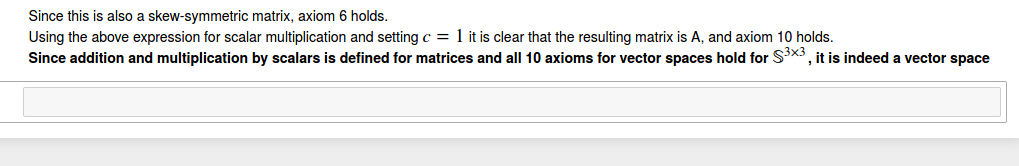